# Kaprekar's Constant

*Topics: Number thoery (math), statistics*

*Prerequisite knowledge: None*

There are many random facts and patterns about numbers that most people are not aware of. The study of these patterns in numbers is done in the field of number theory. These facts will seem surprising, and the process by which mathematicians arrive at these conclusions or unintuitive for many. As such, we sort to computational methods to find patterns in numbers. This approach does not formally count as a proof, but can help visualise the patterns, which may lead to greater insights.

One class of problems involve the finding patterns in prime numbers.

Another example of a famous problem in number theory is Goldbach's conjecture. It states that every even number (except 2) can be expressed as the sum of two prime numbers. It remains unsolved to this day, and a monetary prize awaits the one who delivers proof that it is true, or disproves it.

In this example, we will be looking at a class of special numbers that are derived from an iterative process. We will be looking at Kaprekar's constant, which can be found from 4-digit numbers.

## Theory

Mathematician Dattatreya Ramchandra Kaprekar proposed an iterative process as follows:

1.   Take an input number X
2.   Append zeros to the front of X to make it 4-digits
3.   Rearrange digits in X in ascending order (denoted as A)
4.   Rearrange digits in X in descending order (denoted as B)
5.   Find the difference between these two numbers $|A-B|$, and return it to step (1) if the value does not converge (Remain fixed)

Doing this process for 4-digit numbers, we will arrive at 6174, known as Kaprekar's constant (In most cases). This value will return itself when fed through this process.

*Think: In what cases will this be not true?*

## Model

First, we will need to import the necessary libraries. We will need *matplotlib.pyplot* for plotting. If more complex math operations are needed, we might have to import *numpy* or *math*. In this example, we will not need them.

In [17]:
import matplotlib.pyplot as plt

Next, we will define a function to iteratively apply Kaprekar's routine. This allows for versitility when we want to analyse a bigger group of numbers.

It will accept in an initial number, and return a list of numbers as it repeats Kaprekar's routine. 


---


It is strongly recommended that you try to implement the routine yourself without referencing the following code for practice. There are several approaches to doing this, so work with what you are most comfortable with. This following code may not be the most "*efficient*".

In [32]:
# Defining our function

def Kaprekar_Routine(num, num_of_digits = 4):
    # It takes in the initial number, and optionally, the number of digits
    # We will set the default number of digits to 4

    string_num = str(num).zfill(num_of_digits)                      # Converts it to a string for easy sorting of order of digits

    sorted_char = sorted(string_num)                                # Sorts the digits in the number. This returns a list

    asc_order = "".join(sorted_char)                                # Changes the above list to a string
    desc_order = asc_order[::-1]                                    # Reverses the order as another number (Using slicing)

    numbers = (int(asc_order), int(desc_order))                     # Makes a tuple of the two numbers       
    min_val = min(numbers)                                          # Extract the smaller number
    max_val = max(numbers)                                          # Extracts the larger number

    diff = max_val - min_val                                        # Finds the difference

    if diff == num:                                                 # If this difference is the same as the input
        return [num]                                                # We return it in a list (Which we will add the previous numbers to)
    else:                                                           # If we haven't reached the end of the routine, initial not = final
        next_values = Kaprekar_Routine(diff)                        # We repeat the process, by throwing it into the function again
                                                                    # Note that we have "next_values" here to receive the list of numbers
        return [num] + next_values                                  # We add the value we took in
                                                                    # and return it
                                                                    # It should deliver a ordered list of the numbers conputed

Let's give this function a test! Let's start with a random number, and see how does it approach the constant

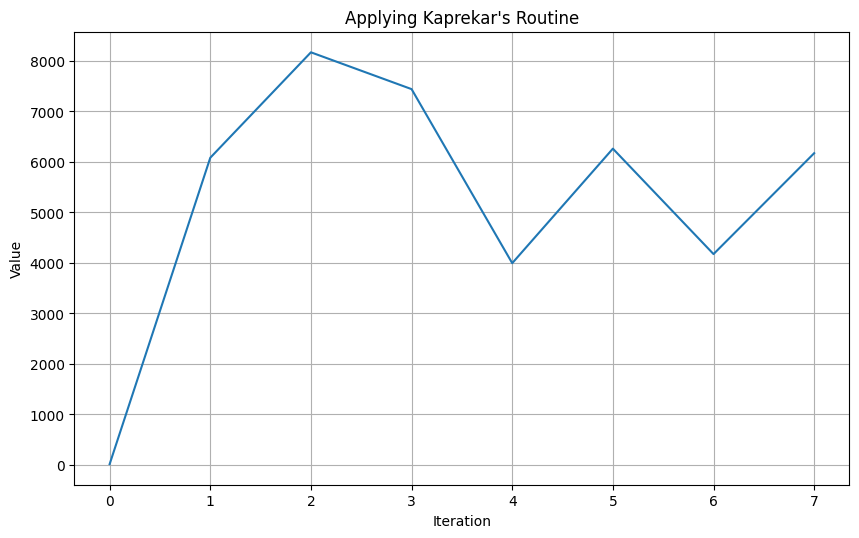

In [33]:
initial_seed = 16                                   # Initial value

values = Kaprekar_Routine(initial_seed)             # The list of values from the routine

plt.figure(figsize = (10,6), dpi = 100)             # Setting up the resolution

plt.plot(list(range(len(values))), values)          # We plot out number of steps against the values obtained
plt.grid()                                          # Turns on the background grid
plt.title("Applying Kaprekar's Routine")            # Adds a header
plt.xlabel("Iteration")                             # Labels the x-axis
plt.ylabel("Value")                                 # and y-axis
plt.show()                                          # Prints the plot

We can see that in this case, it converges in 7 steps.

Let's try doing this for all 4-digit numbers. Using a for-loop, we find that

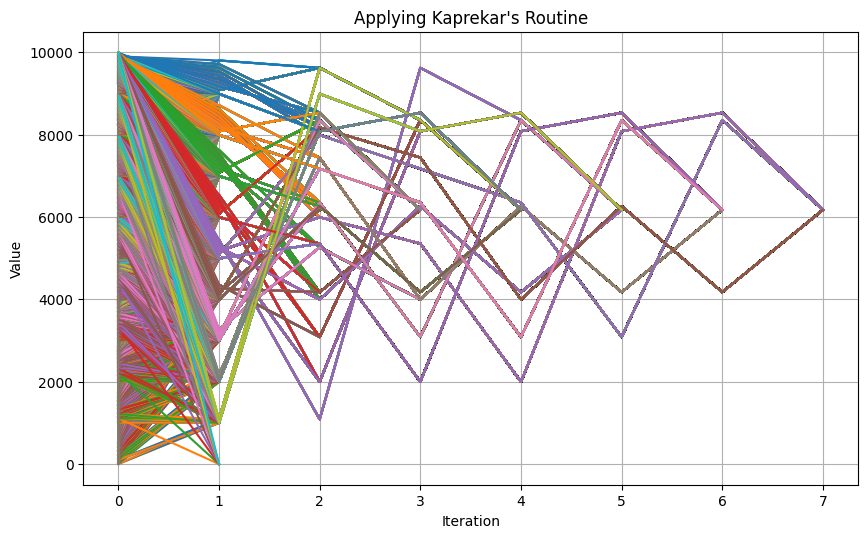

In [34]:
initial_seeds = [i for i in range(10000)]                   # From 0 to 9999, we make a list of initial values

plt.figure(figsize = (10,6), dpi = 100)

for num in initial_seeds:
    values = Kaprekar_Routine(num)                          # The list of values from the routine

    plt.plot(list(range(len(values))), values)              # We plot out number of steps against the values obtained
    
plt.grid()                                                  # Turns on the background grid
plt.title("Applying Kaprekar's Routine")                    # Adds a header
plt.xlabel("Iteration")                                     # Labels the x-axis
plt.ylabel("Value")                                         # and y-axis

plt.show()                                                  # Prints the plot

Slowly, we can see the random numbers converging. We can observe that a maximum of 7 steps are needed to reach the final value 6174.

Earlier, it was mentioned that some numbers do not converge at Kaprekar's constant. From the graph above, we can see that some numbers fall to 0. Let's verify what numbers they converge at:

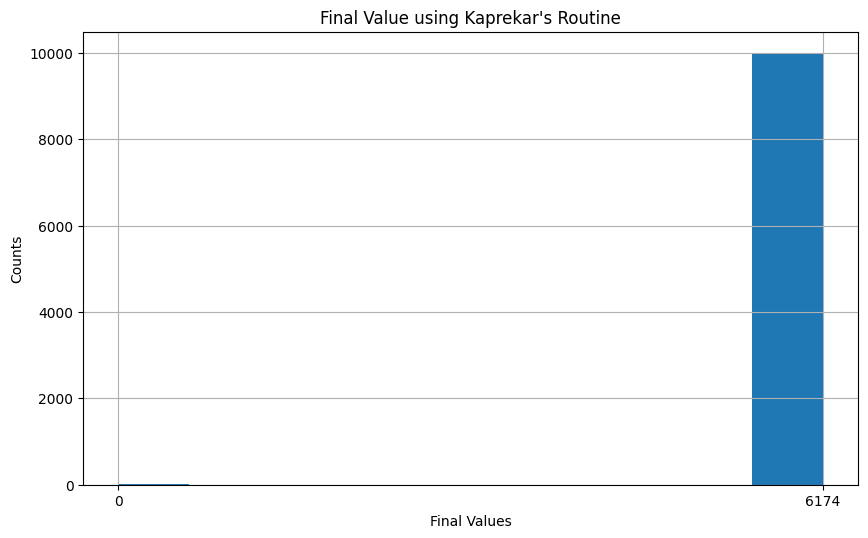

In [41]:
initial_seeds = [i for i in range(10000)]                   # List of initial values, 0 - 9999
results = [Kaprekar_Routine(i) for i in initial_seeds]      # Another way of running the loop, this is a list of lists

final_value = [str(i[-1]) for i in results]                 # Taking the final value

plt.figure(figsize = (10,6), dpi = 100)     

plt.hist(final_value)                                       # We plot a histogram of final values
plt.title("Final Value using Kaprekar's Routine")
plt.xlabel("Final Values")
plt.ylabel("Counts")
plt.grid()
plt.show()

We see that it converges at $0$ for some (few) numbers. Let's check which are our special cases:

In [36]:
for i in results:               # Going over the list of lists
    if i[-1] == 0:              # If the final value reaches 0
        print(i[0])             # Print the starting values

0
1111
2222
3333
4444
5555
6666
7777
8888
9999


Now, we can clearly see why these numbers converge at 0 instead of 6174.

In the name of interest, we can also look at the distribution of the number of steps needed to converge at a number using Kaprekar's routine.

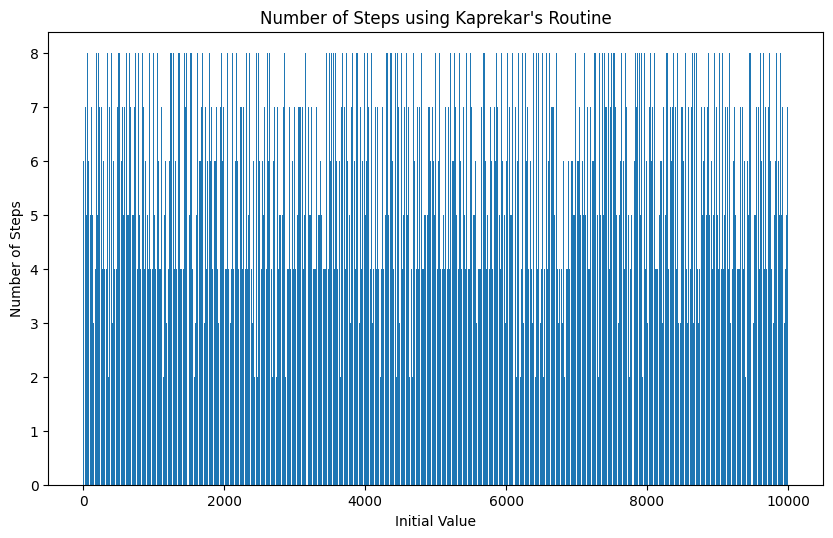

In [37]:
num_steps = [len(i) for i in results]                       # Finding the length of the list returned by the function

plt.figure(figsize = (10,6), dpi = 100)

plt.bar(initial_seeds, num_steps)                           # This time, we do a bar plot
plt.title("Number of Steps using Kaprekar's Routine")
plt.xlabel("Initial Value")
plt.ylabel("Number of Steps")

plt.show()

We can see that there is some pattern in this. From above, we already know the numbers that converges in one step (multiples of 1111, and 6174), which leads to periodic dips in this graph. Let's see the histogram of the number of steps:

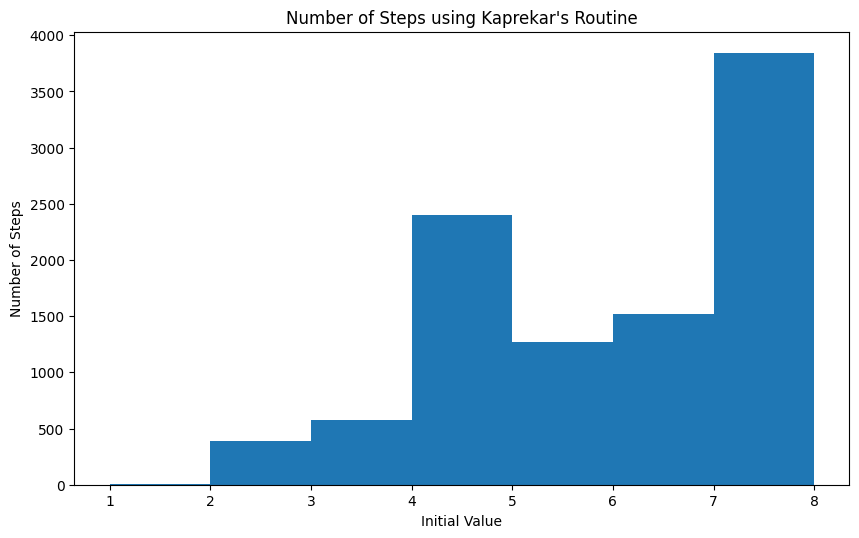

In [39]:
plt.figure(figsize = (10,6), dpi = 100)

plt.hist(num_steps, bins = 7)                           # This time, we do a bar plot
plt.title("Number of Steps using Kaprekar's Routine")
plt.xlabel("Initial Value")
plt.ylabel("Number of Steps")

plt.show()

The bar plots show that 7 steps is the most common, followed by 4. (Go ahead an fix the alignment of the plot, its probably on code stackexchange if you google it)

## Possible Extensions



*   We have looked at 4 digits. What about other numbers of digits
*   Try another routine.
*   Try this: https://www.youtube.com/watch?v=EK32jo7i5LQ 

